[Video Presentation](https://youtu.be/4i7CT97ryBw)

# COGS 108 - Final Project

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ x ] YES - make available
* [  ] NO - keep private

# Names

Jason Artley <br> 
Gabriella Butters <br> 
Wing Yin Chan <br> 
Michael Wenbin Jiang <br> 
Sol Valdimarsdottir <br> 

# Abstract

SNL is an American comedy talk show bringing together members of popular media for comedic skits. The first episode to ever air was on October 11th, 1975 and it quickly gained popularity and currently has 951 episodes and 48 total seasons, with no plans on stopping. Our group aimed to take data and ask questions about Saturday Night Live, (SNL). This project tackled how different trends and ratings affected the likelihood that a guest host, depending on occupation within popular media, would come back to host another episode of Saturday Night Live in the future. This project will be using the database from IMDb rating website. In the section data analysis, our group generated and utilized different graphs to visually represent and explore these correlations between IMDb rating and host return rate by categories. Our result shows that there is a negative trend with host return frequency based on individual and ratings. However, we identified a correlation between certain categories, such as actors and comedians, and their likelihood of being invited back to host.

# Research Question

How do the IMDb ratings of 'Saturday Night Live' episodes vary with guest hosts from different categories (Actor, Musician, Comedian, Other), and what patterns or trends can be identified in episode ratings based on these host categories? Are there any notable trends or relationships between these factors (guest host categories and episode ratings) and the likelihood of guest hosts returning to host more episodes over the show's history since 1975?

## Background and Prior Work

Saturday Night Live, commonly known as SNL is a comedy talk show which brings together members of popular media to perform various skits, discuss politics (in a satirical way) and joke about what is going on in the pop culture of the Western United States. Based in New York City, the show has been running for over 40 years, with the first episode airing on October 11th, 1975. The show altogether has around 48 seasons, and 951 episodes that have aired onto American television. During each episode, a new guest will host the show, with Alec Baldwin being the most popular, hosting over 17 times over the course of 25 years. Some notable hosts include Tina Fey, Will Ferrell and for the most recent episode coming up, Timothee Chalamet and Boygenius as the musical show. These results can be important as SNL can take this information into consideration when planning new episodes. They can take the humor of one episode with a high rating into account or look at the host of a lower rating and see the flaws that went wrong when reviewing the episode. The variables of ratings and hosts are important due to the host being a big consideration on the ratings, as the show is primarily based on who hosts the show for that given week. This also takes into account if they will invite the host back for another episode.

For the first reference<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_ref-1), the analysis on Bray talks about how based on the grueling arrangement the show has and the amount of pressure the writers are under (it plays May through September), if the fatigue of the writers correlates to the performance of the show itself during the middle of the season. To do this, Bray took the IMDB of different episodes of SNL and ran tests on how the episode was viewed by the media by merging two data sets and filtering different information out to get his desired data set. From there, and a couple of other tests using charts and graphs, he was able to make out what were considered the “mediocre” seasons and episodes, though all in all he did not finish his research to make a plausible conclusion about the show.
<br><br>
For the second reference<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_ref-2), it discusses the impact of SNL and how it connects and correlates with the film production, whether that be film, podcast, tv, music, etc. For this, the people conducting the experiment used what is called “SNL films” and connected them to SNL and other respected popular culture works by viewing the writers and actors. For this, they took an SNL actor, researched how many times they were in the show, what they did and how they did and made a coefficient for it. From there, they took into consideration additional factors, like rating, genre and score and found interesting findings regarding the network of SNL shows. Through these findings, they were able to see how the connections between SNL and actors correlated to higher comedies elsewhere across popular culture and media. 

References: <br> 
1. <a name="SNL Episode Ratings"></a> [^](#cite_ref-1) Bray, Mathieu. (2007) Exploratory Analysis on SNL Episode Ratings. *mathieubray*. https://www.mathieubray.com/2017/11/25/snl-charts/ 
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Esten. (2022) Mean Girls is a Saturday Night Live film, and other data findings. *jeffreymoro*  https://snl-coefficient.github.io/introduction/


# Hypothesis


We hypothesize that the IMDb rating of guest hosts who are actors has a significant positive influence on the IMDb rating of the corresponding “Saturday Night Live” episodes. Higher-rated guest hosts are more likely to deliver memorable performances and raise favorable audience perception, leading to a greater likelihood of these guest hosts returning to host multiple episodes. If a host’s aired episode(s) receives bad ratings, they are most likely not coming back.

# Data

Dataset #1 <br><br> 
Dataset Name: IMDb ratings <br> 
Link to the dataset: https://m.imdb.com/search/title/?series=tt0072562&sort=user_rating,desc&count=250 <br>
Number of observations: 955 <br>
Number of variables: 5 - Raw Episode Name, Air Year, Rating, Votes, Host <br>

Our dataset that we are collecting our data from is the IMDb website, which includes the episode name, date of air, rating, audience rating, etc. When gathering our data, the most important variables we looked at were raw episode name, air year, rating, votes, and host. The raw episode name is the name of the episode on the day it aired, air year is what year the episode aired, rating is on a scale of one to ten, ten being the best and one being the worst, how well the episode did, votes is how much people voted for the episode in terms of how good the episode was, and host was who was hosting the episode on the given day. 

Because the entries on the page only go to 250, we used URLs based on the ranges and used a counting for loop to iterate through the pages. Untidy strings, such as the ones in the titles of each episode, contain the airing year, which can be put in a new column ‘year.’ For data that contains values of NaN, we only had to remove one singular case of NaN from our dataset, which is the newest non-rated episode (as of 11/15/23).  
 <br>

## Dataset IMDB ratings

## Setup

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***
## Loading the Data
In this section, we retrieve the SNL data from a specified GitHub URL. The HTML content of the page, which includes detailed information about each SNL episode, is fetched using the requests library and then parsed using BeautifulSoup for further processing. Due to several challenges regarding changing web URLs, site HTML updates, and denied get() requests, we opted to instead download a version of the web page. This version (taken 11/14/23 @ 3:00 PM) was uploaded to GitHub, and is the basis of what we're using to scrape the data.

In [2]:
# Link to raw IMDB webpage
github_url = 'https://raw.githubusercontent.com/shoepack/SNL-IMDB-Ratings/main/Saturday%20Night%20Live%20(Sorted%20by%20Release%20date%20Ascending).html'

In [3]:
# Fetch the HTML content from GitHub
response = requests.get(github_url)
imdb_html_content = response.content

# Parse the IMDB HTML content with BeautifulSoup
soup = BeautifulSoup(imdb_html_content, 'html.parser')

Upon retrieving the HTML content, we focus on extracting the relevant data. This includes episode names, air years, ratings, and the number of votes. Using BeautifulSoup, we navigate through the HTML structure to locate and extract these details, storing them in separate lists for further analysis.

In [4]:
# Initialize lists that we'll be using to store episode data
episode_name = []
air_year = []
rating = []
votes = []

episode_data = soup.findAll('li', attrs= {'class': 'ipc-metadata-list-summary-item'})

for ep in episode_data:
    ep_title_div = ep.find('div', class_='dli-ep-title')
    if ep_title_div:
        
        # Extracting the episode name
        name = ep_title_div.find('h3', class_='ipc-title__text').text
        episode_name.append(name)
        
        # Extracting the episode's air year
        year_span = ep.find('span', class_='dli-ep-year')
        if year_span:
            year = year_span.text.strip('()')
        else:
            year = 'Nan'
        air_year.append(year)
        
        # Extracting the episode's IMDB rating and number of votes
        rating_votes_span = ep.find('span', class_='ipc-rating-star--imdb')
        if rating_votes_span:
            rating_votes_text = rating_votes_span.text.split('\xa0')
            rate = rating_votes_text[0].strip()
            vote = rating_votes_text[1].strip('()')
        else:
            rate = 'NaN'
            vote = 'NaN'
        rating.append(rate)
        votes.append(vote)

* * *
## Initial Data Overview
After data extraction, we perform an initial assessment of the data by checking the size of each list. This helps ensure that all lists are of equal length, indicating a consistent data extraction process before we proceed to create a DataFrame.

In [5]:
# Checking the sizes of all columns before creating the DataFrame
print(f"Size of episode_name list: {len(episode_name)}")
print(f"Size of air_year list: {len(air_year)}")
print(f"Size of rating list: {len(rating)}")
print(f"Size of votes list: {len(votes)}")

Size of episode_name list: 955
Size of air_year list: 955
Size of rating list: 955
Size of votes list: 955


Next, we convert the extracted data into a structured format using pandas DataFrame. This allows for more efficient manipulation and analysis. Each column in the DataFrame corresponds to different aspects of the SNL episodes such as name, air year, rating, and votes.

In [6]:
# Creating a DataFrame, 'df'
df = pd.DataFrame({
    'Raw Episode Name': episode_name,
    'Air Year': air_year,
    'Rating': rating,
    'Votes': votes
})

* * *
## Data Cleaning
In it's current state, the DataFrame df is not cleaned and tidied. In this part, we define a function clean() to clean the episode titles and extract the host names. We also replace any placeholder 'NaN' strings with actual NumPy NaN values and drop any rows with missing data to ensure that the dataset is more consistent and of a higher quality.

In [7]:
"""
Description:
* Cleans the untidy titles from the 'Saturday Night Live' series.

Steps:
1. Removes the standard prefix 'Saturday Night Live (Year)\nEpisode: '.
2. Truncates the string at the first occurrence of '/', if present.
3. Removes any additional 'Saturday Night Live:' prefix.

Parameters:
* input_str (str): The original, untidy title string.

Returns:
* str: The cleaned title string.
"""

def clean(input_str):

    # Remove standard prefix
    cleaned_title = re.sub(r'Saturday Night Live \(.*\)\nEpisode:|Saturday Night Live at Home: |SNL At Home: ', '', input_str)

    # Truncate at '/', if present
    cleaned_title = cleaned_title.split('/', 1)[0].strip() if '/' in cleaned_title else cleaned_title.strip()

    # Remove additional specific prefix
    cleaned_title = cleaned_title.replace('Saturday Night Live:', '').strip() if cleaned_title.startswith('Saturday Night Live:') else cleaned_title
    cleaned_str = re.sub(r'(Saturday Night Live: |Saturday Night Live at Home: |SNL At Home: )', '', input_str)

    # Extract the name before '/'
    cleaned_title = cleaned_str.split('/')[0].strip()

    return cleaned_title

In [8]:
# Clean the episode name and store the host name in new column 'Host'
df['Host'] = df['Raw Episode Name'].apply(clean)

NaN is currently stored as a string, so we need to convert it, then drop any NaN row(s)

In [9]:
# Replace 'NaN' strings with actual np.nan
df.replace('NaN', np.nan, inplace=True)

# Drop rows with any np.nan values
df.dropna(inplace=True)

* * *
## Data Formatting and Visualization
The final step of this process involves formatting the DataFrame for better readability before we start working on visualizations. We apply custom styles for correctly aligning text in different columns and display the formatted table. This should make the data more comprehensible and visually appealing.

In [10]:
# Left/right aligned columns
left_aligned_columns = ['Raw Episode Name', 'Host']
right_aligned_columns = ['Air Year', 'Rating', 'Votes']

# Define custom styles for headers
header_styles = [
    {'selector': 'th', 'props': [('text-align', 'center')]}  # Default alignment for all headers
]
header_styles += [{'selector': f'th.col_heading.level0.{col}', 'props': [('text-align', 'left')]} for col in left_aligned_columns]
header_styles += [{'selector': f'th.col_heading.level0.{col}', 'props': [('text-align', 'right')]} for col in right_aligned_columns]

In [11]:
# Display the first 10 rows of the DataFrame with customized styling applied
df.head(10).style \
    .set_table_styles(header_styles) \
    .set_properties(subset=left_aligned_columns, **{'text-align': 'left'}) \
    .set_properties(subset=right_aligned_columns, **{'text-align': 'right'})

,Raw Episode Name,Air Year,Rating,Votes,Host
0,Saturday Night Live: George Carlin/Billy Preston/Janis Ian,1975,7.4,525,George Carlin
1,Paul Simon/Randy Newman/Phoebe Snow,1975,6.2,341,Paul Simon
2,Rob Reiner,1975,6.8,293,Rob Reiner
3,Candice Bergen/Esther Phillips,1975,7.0,271,Candice Bergen
4,"Robert Klein/ABBA, Loudon Wainwright III",1975,6.5,236,Robert Klein
5,Lily Tomlin,1975,6.9,232,Lily Tomlin
6,Richard Pryor/Gil Scott-Heron,1975,8.3,338,Richard Pryor
7,Candice Bergen/Martha Reeves/The Stylistics,1975,7.0,212,Candice Bergen
8,Elliott Gould/Anne Murray,1976,7.0,185,Elliott Gould
9,"Buck Henry/Bill Withers, Toni Basil",1976,7.6,190,Buck Henry


Next, we'll perform a couple of different checks to ensure that our data is correctly cleaned and tidied.
The various tests conducted include:
* Printing the Shape of the DataFrame
* Checking for Null Values
* Check for Outliers using describe()
* Showing Sample Data

In [12]:
print("DataFrame Shape:", df.shape)

DataFrame Shape: (954, 5)


In [13]:
null_values = df.isnull().sum()
print("Null Values in Each Column:\n", null_values)

Null Values in Each Column:
 Raw Episode Name    0
Air Year            0
Rating              0
Votes               0
Host                0
dtype: int64


In [14]:
# Convert 'Air Year' to a numeric column (integers)
df['Air Year'] = pd.to_numeric(df['Air Year'], errors='coerce')

# Convert 'Rating' and 'Votes' to numeric columns (floats)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

# Display statistical summaries for 'Air Year', 'Rating', and 'Votes' recorded
statistical_summary = df[['Air Year', 'Rating', 'Votes']].describe()
print("Statistical Summary:\n", statistical_summary)

Statistical Summary:
           Air Year      Rating       Votes
count   954.000000  954.000000  954.000000
mean   1999.352201    6.519182  158.629979
std      13.989190    0.788825  111.149457
min    1975.000000    3.100000   58.000000
25%    1987.000000    6.000000   85.000000
50%    2000.000000    6.500000  109.000000
75%    2012.000000    7.100000  200.750000
max    2023.000000    8.900000  841.000000


In [15]:
df.sample(5)

,Raw Episode Name,Air Year,Rating,Votes,Host
503,Renée Zellweger/Eve,2001,5.2,94,Renée Zellweger
792,Donald Trump/Sia,2015,3.1,775,Donald Trump
457,Bill Paxton/Beck,1999,6.4,100,Bill Paxton
949,Ana de Armas/Karol G,2023,6.1,250,Ana de Armas
232,Mark Harmon/Suzanne Vega,1987,5.5,65,Mark Harmon


# Data Analysis & Results

### Section 1 of EDA - Impact of Host Category on Episode Ratings

For the first part of our EDA, we explore the extent to which IMDb ratings of episodes are influenced by guest hosts, particularly those who are prominent figures in popular culture.

[7.4 6.2 6.8 7.  6.5 6.9 8.3 7.6 7.2 6.4 7.1 5.2 6.7 7.7 6.3 7.3 7.5 6.6
 7.8 6.1 8.7 7.9 8.  5.8 5.9 6.  5.5 5.7 5.6 5.4 5.1 4.8 5.3 4.9 8.4 4.7
 4.5 4.6 5.  8.1 4.4 4.3 3.7 4.2 3.9 8.6 8.9 3.1 8.2 8.8]


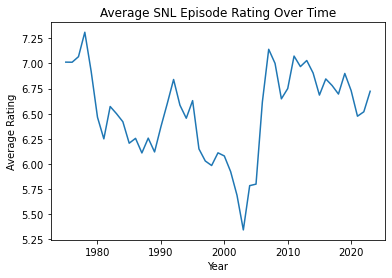

In [16]:
# First, inspect the 'Rating' column for non-numeric values
print(df['Rating'].unique())

# Convert 'Rating' to a numeric type, coercing errors
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Convert 'Air Year' to datetime format
df['Air Year'] = pd.to_datetime(df['Air Year'], format='%Y')  # Adjust format if needed

# Group by year and calculate mean
average_rating_per_year = df.groupby(df['Air Year'].dt.year)['Rating'].mean()

# Plotting
average_rating_per_year.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average SNL Episode Rating Over Time')
plt.show()

Our line plot shows that audience approval of SNL episodes tend to fluctuate greatly, the peak being near the 1980s, and the lowest dip in the early 2000’s. In the past decade, the ratings have been oscillating quite frequently, although as of 2023 the trend has been looking upwards.

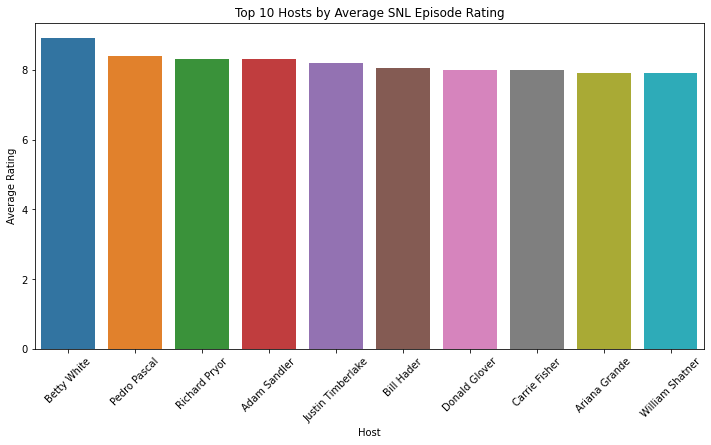

In [17]:
# Frequency of hosts and average rating
host_frequency = df['Host'].value_counts()
average_rating_per_host = df.groupby('Host')['Rating'].mean()

# Combining the analyses
host_analysis = pd.DataFrame({'Frequency': host_frequency, 'Average_Rating': average_rating_per_host})
host_analysis
top_hosts = host_analysis.sort_values('Average_Rating', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_hosts.index, y='Average_Rating', data=top_hosts)
plt.xticks(rotation=45)
plt.xlabel('Host')
plt.ylabel('Average Rating')
plt.title('Top 10 Hosts by Average SNL Episode Rating')
plt.show()

Our top 10 Hosts show that Betty White has been the most popular host by far, with her hosted episode scoring > 8. 

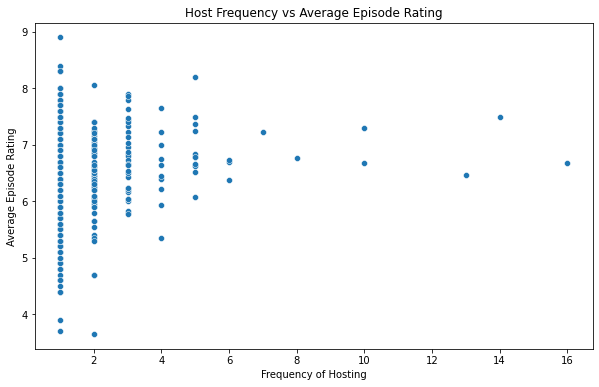

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Frequency', y='Average_Rating', data=host_analysis)
plt.xlabel('Frequency of Hosting')
plt.ylabel('Average Episode Rating')
plt.title('Host Frequency vs Average Episode Rating')
plt.show()

It shows a downward trend in a celebrity host’s average episode rating, and the frequency of which they host. This contradicts our hypothesis, where we predicted that celebrities with the highest rated episodes would continue to host again to boost SNL’s ratings.

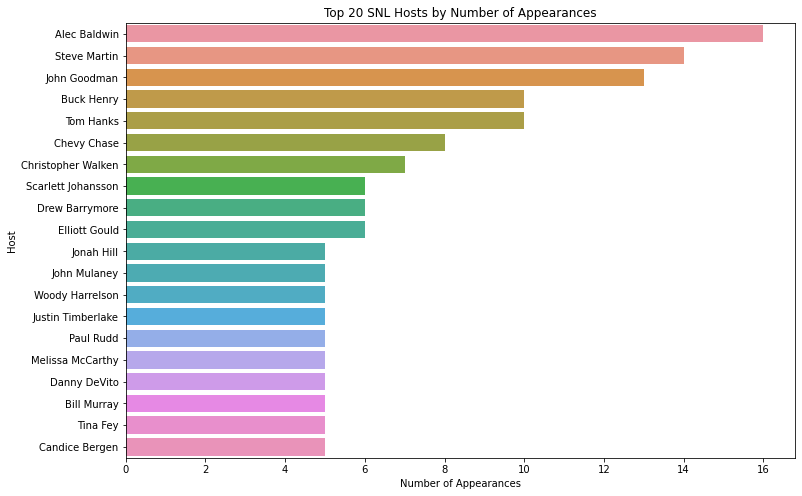

In [19]:
host_frequencies = df['Host'].value_counts()
host_frequencies
df['Host_Frequency'] = df['Host'].map(host_frequencies)
# top 20 hosts
top_hosts = host_frequencies.head(20)

plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.barplot(x=top_hosts.values, y=top_hosts.index)  # x for frequencies, y for host names

plt.xlabel('Number of Appearances')
plt.ylabel('Host')
plt.title('Top 20 SNL Hosts by Number of Appearances')
plt.show()

Earlier, we said that Betty White’s episode was most popular, yet she does not appear in this list of top 20 most frequent SNL hosts. Once again, this disproves our hypothesis assuming that hosts with the highest rated episodes would host once again. 

Now, we are going to label each host with its corresponding category.

In [21]:
host_df = pd.read_csv('https://raw.githubusercontent.com/shoepack/SNL-IMDB-Ratings/main/host_column%20-%20host_column.csv')
host_df

,Host,Category
0,George Carlin,Comedian
1,Paul Simon,Musician
2,Rob Reiner,Actor
3,Candice Bergen,Actor
4,Robert Klein,Comedian
...,...,...
949,Ana de Armas,Actor
950,Pete Davidson,Actor
951,Bad Bunny,Musician
952,Nate Bargatze,Comedian


In [22]:
df

,Raw Episode Name,Air Year,Rating,Votes,Host,Host_Frequency
0,Saturday Night Live: George Carlin/Billy Prest...,1975-01-01,7.4,525,George Carlin,2
1,Paul Simon/Randy Newman/Phoebe Snow,1975-01-01,6.2,341,Paul Simon,3
2,Rob Reiner,1975-01-01,6.8,293,Rob Reiner,1
3,Candice Bergen/Esther Phillips,1975-01-01,7.0,271,Candice Bergen,5
4,"Robert Klein/ABBA, Loudon Wainwright III",1975-01-01,6.5,236,Robert Klein,2
...,...,...,...,...,...,...
949,Ana de Armas/Karol G,2023-01-01,6.1,250,Ana de Armas,1
950,Pete Davidson/Ice Spice,2023-01-01,6.4,336,Pete Davidson,1
951,Bad Bunny,2023-01-01,5.3,320,Bad Bunny,1
952,Nate Bargatze/Foo Fighters,2023-01-01,7.7,294,Nate Bargatze,1


In [23]:
merged_df = pd.merge(host_df[['Host', 'Category']], df, on='Host')
merged_df

,Host,Category,Raw Episode Name,Air Year,Rating,Votes,Host_Frequency
0,George Carlin,Comedian,Saturday Night Live: George Carlin/Billy Prest...,1975-01-01,7.4,525,2
1,George Carlin,Comedian,George Carlin/Frankie Goes to Hollywood,1984-01-01,7.4,92,2
2,George Carlin,Comedian,Saturday Night Live: George Carlin/Billy Prest...,1975-01-01,7.4,525,2
3,George Carlin,Comedian,George Carlin/Frankie Goes to Hollywood,1984-01-01,7.4,92,2
4,Paul Simon,Musician,Paul Simon/Randy Newman/Phoebe Snow,1975-01-01,6.2,341,3
...,...,...,...,...,...,...,...
2605,Quinta Brunson,Other,Quinta Brunson/Lil Yachty,2023-01-01,7.1,273,1
2606,Ana de Armas,Actor,Ana de Armas/Karol G,2023-01-01,6.1,250,1
2607,Pete Davidson,Actor,Pete Davidson/Ice Spice,2023-01-01,6.4,336,1
2608,Bad Bunny,Musician,Bad Bunny,2023-01-01,5.3,320,1


In [24]:
df_unique_hosts = merged_df.drop_duplicates(subset='Raw Episode Name', keep='first')
df_unique_hosts.reset_index().drop(columns='index')

,Host,Category,Raw Episode Name,Air Year,Rating,Votes,Host_Frequency
0,George Carlin,Comedian,Saturday Night Live: George Carlin/Billy Prest...,1975-01-01,7.4,525,2
1,George Carlin,Comedian,George Carlin/Frankie Goes to Hollywood,1984-01-01,7.4,92,2
2,Paul Simon,Musician,Paul Simon/Randy Newman/Phoebe Snow,1975-01-01,6.2,341,3
3,Paul Simon,Musician,Paul Simon/George Harrison,1976-01-01,7.5,171,3
4,Paul Simon,Musician,Paul Simon/Linda Ronstadt,1987-01-01,5.9,65,3
...,...,...,...,...,...,...,...
942,Quinta Brunson,Other,Quinta Brunson/Lil Yachty,2023-01-01,7.1,273,1
943,Ana de Armas,Actor,Ana de Armas/Karol G,2023-01-01,6.1,250,1
944,Pete Davidson,Actor,Pete Davidson/Ice Spice,2023-01-01,6.4,336,1
945,Bad Bunny,Musician,Bad Bunny,2023-01-01,5.3,320,1


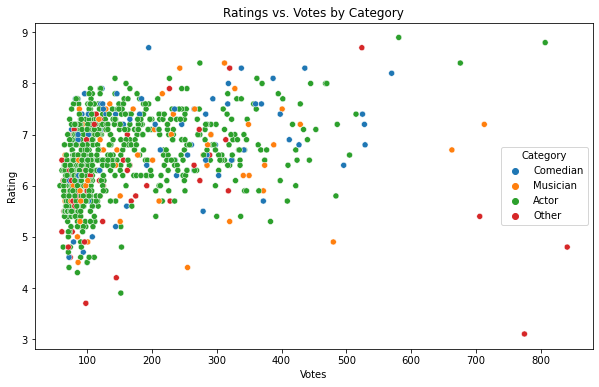

In [25]:
# Scatter plot of ratings vs. votes for each category
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Rating', hue='Category', data=df_unique_hosts)
plt.title('Ratings vs. Votes by Category')
plt.show()

Outliers on this plot point to that the the most controversial or hated episodes (<5 for their rating-score) have the most votes, of users showing their dislike of the episode. However, there are also many highly rated episodes with many votes. On average, there tends to be 300 or less votes containing an average score from 5-8, showing that less controversial episodes tend to generate less conversation/votes. 

By observing the categories of hosts, we can also determine from this plot that most hosts tend to be Actors. There is no trend of category of hosts with the highest rated episodes, however surprisingly enough hosts in the ‘Other’ category tend to have the lowest rated episodes, with a few exceptions. Perhaps this is partly due to ‘Other’ being a large umbrella term, covering celebrities who could be anyone from politicians (highly controversial individuals), to entrepreneurs (Elon Musk), to several different sports officials.


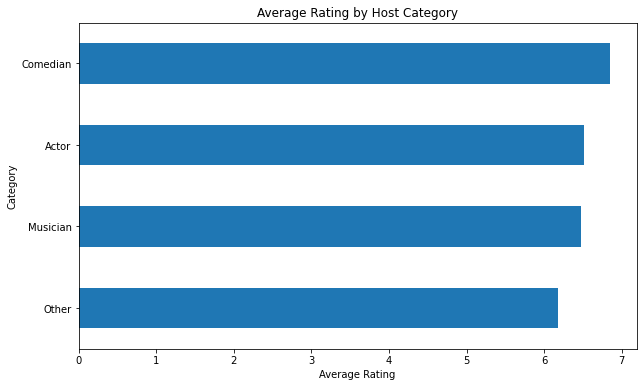

In [26]:
# Calculate average rating for each category
avg_rating_by_category = df_unique_hosts.groupby('Category')['Rating'].mean()

# Plot
avg_rating_by_category.sort_values().plot(kind='barh', figsize=(10, 6))
plt.xlabel('Average Rating')
plt.title('Average Rating by Host Category')
plt.show()

The graph shows that “Comedian” has the highest average rating, approximately 6.7 out of the four categories we have and “Other” displaying the lowest ratings. This is interesting because there are more Actors than Comedians, yet the Comedians have the higher rating the Actors.

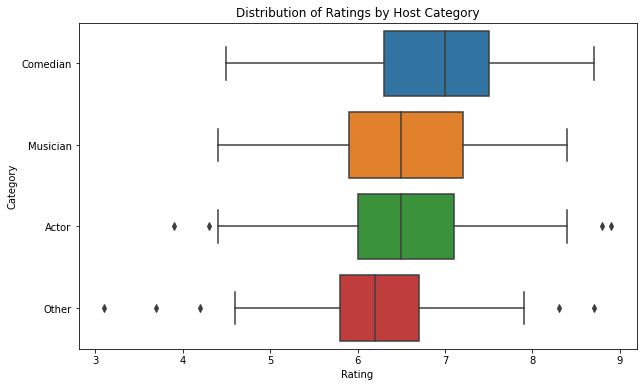

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', y='Category', data=df_unique_hosts)
plt.title('Distribution of Ratings by Host Category')
plt.show()

The box and whiskers plot demonstrates the category of the type of person on SNL and correlates it to the general rating of the episode. Notably, there are a couple of interesting finds from this plot, with “other” and “actors” having more outliers than “musician” and “comedian”. For all of them, the lower quartile and upper quartile all display very average ratings with not much variability, however, “comedian” has a higher median score than the rest. All in all, this does not support our hypothesis, as it shows that comedians have higher ratings than actors. 

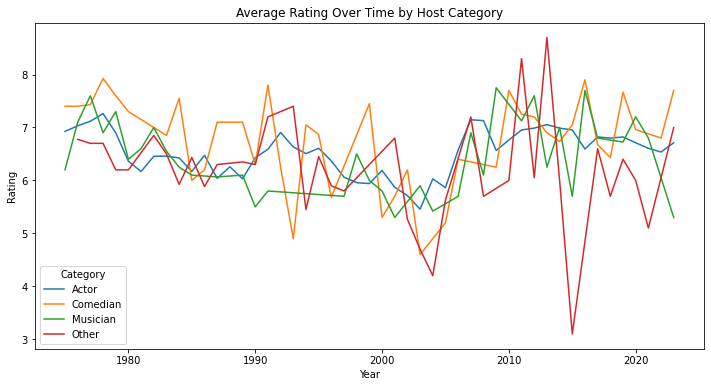

In [29]:
# Convert 'Air Year' to datetime format and extract the year
df_unique_hosts.loc[:, 'Year'] = pd.to_datetime(df_unique_hosts['Air Year']).dt.year

# Calculate average rating per year for each category
avg_rating_per_year_category = df_unique_hosts.groupby(['Year', 'Category'])['Rating'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Rating', hue='Category', data=avg_rating_per_year_category)
plt.title('Average Rating Over Time by Host Category')
plt.show()

As with all of the other data analyses so far, hosts in ‘Other’ category tend to hold the most controversial and fluctuating values, especially after the year 2005. The most populated group, Actors, does not share a lot of highly rated scores, and tends to maintain average scores throughout the show’s entire run time so far. The other two categories share a similar pattern, although Comedians have a lot of fluctuations too, possibly due to their controversial nature.

### Section 2 of EDA - Host Categories’ Frequencies

For the second part of our EDA, it wil be a continuation on discussing the impact of hosts’ categories, and their likelihood to return to the show, shifting away from individual hosts.

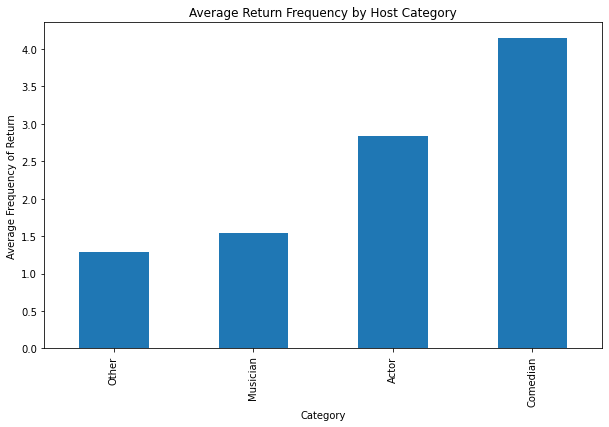

In [30]:
# Calculate the frequency of hosts returning for each category
return_frequency = df_unique_hosts.groupby('Category')['Host_Frequency'].mean()

# Plot
return_frequency.sort_values().plot(kind='bar', figsize=(10, 6))
plt.ylabel('Average Frequency of Return')
plt.title('Average Return Frequency by Host Category')
plt.show()

The graph shows that hosts with comedian category are most likely to get invited again to the show with a 4.0 average frequency of return. This supports our hypothesis on the basis of categorization that popular hosts come back. However, as we have seen in previous graphs, not many of our hosts are comedians, and the population of hosts is largely dominated by actors. 

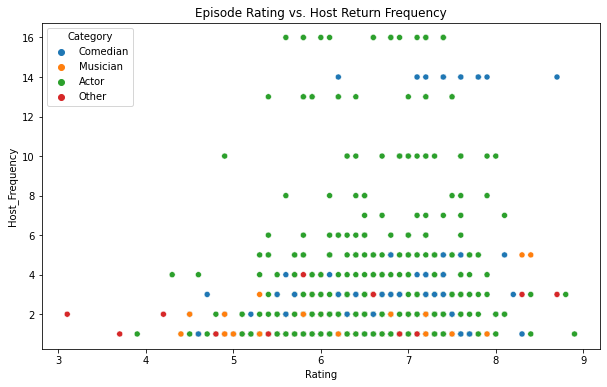

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Host_Frequency', hue='Category', data=df_unique_hosts)
plt.title('Episode Rating vs. Host Return Frequency')
plt.show()

/tmp/ipykernel_350/1604126924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique_hosts.loc[:, 'Frequency_Range'] = pd.cut(df_unique_hosts['Host_Frequency'], bins=[0, 1, 2, 3, 4, 5, 10, 20, 50], include_lowest=True, right=False)


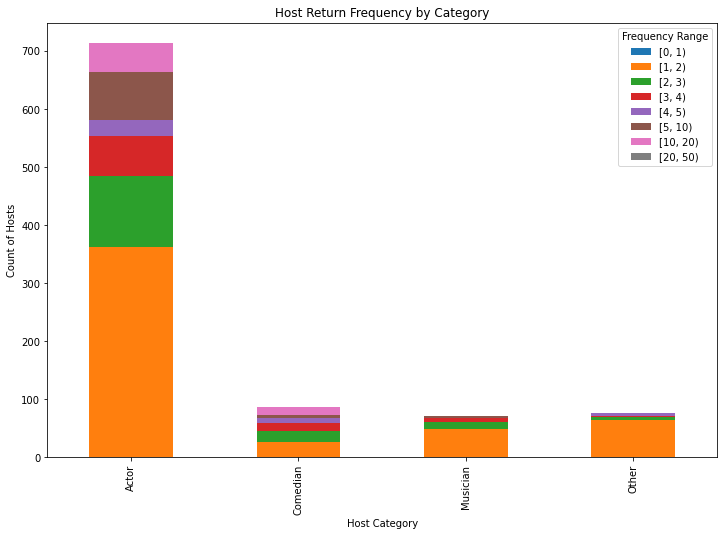

In [32]:
# Create a new column for frequency ranges (adjust the bins as needed)
df_unique_hosts.loc[:, 'Frequency_Range'] = pd.cut(df_unique_hosts['Host_Frequency'], bins=[0, 1, 2, 3, 4, 5, 10, 20, 50], include_lowest=True, right=False)

# Pivot table to count the number of hosts in each frequency range by category
frequency_data = df_unique_hosts.pivot_table(index='Category', columns='Frequency_Range', aggfunc='size', fill_value=0)
# Plot
frequency_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Host Category')
plt.ylabel('Count of Hosts')
plt.title('Host Return Frequency by Category')
plt.legend(title='Frequency Range')
plt.show()

The graph shows that the ‘actor’ category holds the largest amount of hosts.

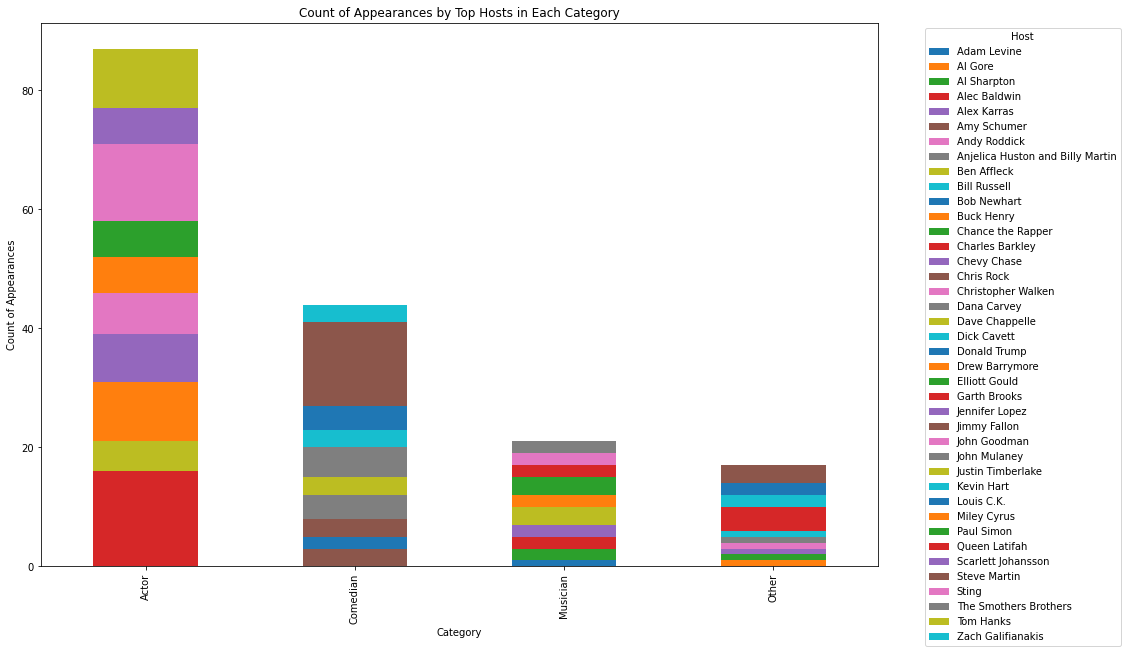

In [33]:
# Group by 'Category' and 'Host' and count the occurrences
host_counts = df_unique_hosts.groupby(['Category', 'Host']).size().reset_index(name='Counts')

# Sort and select top N hosts (e.g., top 10) for each category
top_hosts_per_category = host_counts.groupby('Category').apply(lambda x: x.nlargest(10, 'Counts')).reset_index(drop=True)

# Pivot the data for the stacked bar chart
pivot_data = top_hosts_per_category.pivot(index='Category', columns='Host', values='Counts').fillna(0)

# Plot
pivot_data.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.xlabel('Category')
plt.ylabel('Count of Appearances')
plt.title('Count of Appearances by Top Hosts in Each Category')
plt.legend(title='Host', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


This graph demonstrates the host in alphabetical order, categorizes them into which type of host they are and the number of appearances that they had. Actors took the highest number of appearances while Other displayed the lowest number of hosts in the count of appearances in each category. Within Comedians however, Chris Rock returned frequently in addition to Christopher Walken from the actors category also returning frequently. This shows the trends of actors more than likely getting asked back due to them being actors and having a higher number of hosts on the show, further supporting our hypothesis. 

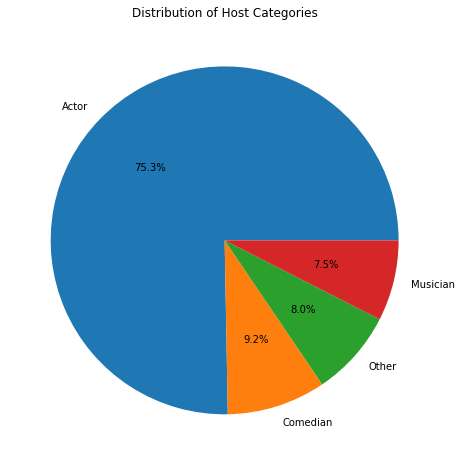

In [34]:
category_counts = df_unique_hosts['Category'].value_counts()

# Plot
plt.figure(figsize=(8, 8))
category_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Host Categories')
plt.ylabel('')  # Hide the y-label
plt.show()

## Standardization From Sampling

The previous graph shows that the based number of each host category is different. With 75.3%, the highest being actor, and the lowest being musician, coming in with a 7.5% guest appearance. To explore the relationship between return rate by category and rating, we stardandize our host distribution of host categories of having equal distribution of each category.

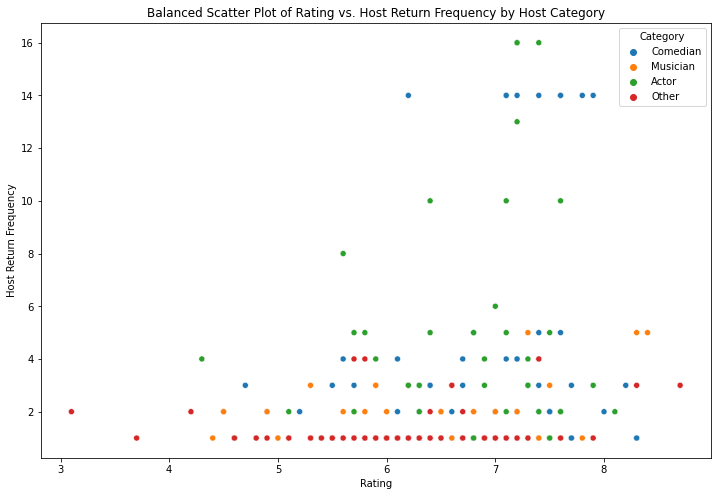

In [36]:
# Get the smallest category size (excluding one category, e.g., 'Actor')
min_category_size = df_unique_hosts[df_unique_hosts['Category'] != 'Actor']['Category'].value_counts().min()

# Create a balanced DataFrame
balanced_df = pd.DataFrame()

for category in df_unique_hosts['Category'].unique():
    category_sample = df_unique_hosts[df_unique_hosts['Category'] == category].sample(n=min_category_size, random_state=1)
    balanced_df = pd.concat([balanced_df, category_sample])

# Scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Rating', y='Host_Frequency', hue='Category', data=balanced_df)
plt.title('Balanced Scatter Plot of Rating vs. Host Return Frequency by Host Category')
plt.xlabel('Rating')
plt.ylabel('Host Return Frequency')
plt.legend(title='Category')
plt.show()

When looking at the balanced scatter plot of rating vs. Return Frequency by Host displays that based on the X-axis Rating, the Host Return frequencies are more likely to come back based on higher ratings especidally for the categories of actor and comedian.

# Ethics & Privacy

For ethics and concerns, it is important to note that the data we collected from IMDb ratings are user-generated and might not always represent an unbiased perspective due to factors like review bombing or selective participation, which could skew the analysis. To address this concern, we will cross-reference our data with other sources to minimize bias and to generate more accurate results. Additionally, we will ensure that our analysis does not unfairly target or critique hosts or demographics by avoiding terms or languages that could be ambiguous. As for transparency, our project will cite all sources and detail every step and methodology for reproducibility. We will provide an accurate review of how our data were collected and the reasoning for the usage of certain analytical tools. <br><br>
For our research topic, privacy is less of a concern since data such as casts, hosts, IMDb rating, year of the show, IMDb rating of each actor, and actors are all collected through websites that are readily available for the public to use. Collection of additional data through outside sources will not be necessary for our research question, so privacy concerns should not be an issue. However, we will still ensure that our process will only collect data that are necessary and avoid using data that could violate the privacy of others.

# Discussion and Conclusion

Initially, our research question asked to find the “extent of IMDb rating of guest hosts who are members of popular culture affect the IMDb rating of ‘Saturday Night Live’ episodes, and whether there are any notable trends or relationships between these factors and the likelihood of guest hosts returning to host more episodes over the show’s history since 1975?”. The scope of the question involved analyzing people who have been on Saturday Night Live and to what extent the guests would return and host more episodes as the show continues to run. Overall, our hypothesis formulated into, “we hypothesize that the IMDb rating of guest hosts who are actors has a significant positive influence on the IMDb rating of the corresponding ‘Saturday Night Live’ episodes. We hypothesized that higher-rated guest hosts are more likely to deliver memorable performances and raise favorable audience perception, leading to a greater likelihood of these guest hosts returning to host multiple episodes. If a host’s aired episode(s) receives bad ratings, they are most likely not coming back.” As time went on and we continued to work on collecting and analyzing data, we realized that the question became too broad, as we had run into some trouble finding the results that we wanted, as well as difficulties encountered with potentially introducing a very untidy secondary dataset relevant to the previous research question. With that, we were able to come up with a more detailed question of, “How do the IMDb ratings of 'Saturday Night Live' episodes vary with guest hosts from different categories (Actor, Musician, Comedian, Other), and what patterns or trends can be identified in episode ratings based on these host categories? Are there any notable trends or relationships between these factors (guest host categories and episode ratings) and the likelihood of guest hosts returning to host more episodes over the show's history since 1975?” This ultimately helped with the original hypothesis and made data cleaning and analysis more smooth in the long run. Due to this, we did not need to change the overall hypothesis we had for the original question. Overall, by making the research question more detailed with different categories of popular media profession and leaning more towards looking at trends, the process of finding an answer to the original hypothesis became much smoother and worked even better in finding the right data within our data sets.

The structuring of the data frame and data collection process is a critical aspect of our project. Additional emphasis was placed on the data cleaning process so that we can accurately extract important and usable information. The process was not easy. We had come up with a way to scrape the IMDb webpage and extract data that is important for our research question. We even ran into a problem with the website changing its format and breaking our code altogether. After the tedious process of webscraping, we were able to compile all of the publicly available and topic-relevant information from IMDb, and hosted the file on a publicly accessible and scrapable GitHub page. From there, we scanned, imported, sorted, and cleaned all of the relevant information into a usable and tidied data frame. We wanted to make sure the data we collected was in a usable and readable format to ensure a smooth transition for our visualizations. For instance, we made sure to categorize guest hosts into actors, musicians, comedians, and others so that we can analyze the categories with other columns. Additionally, each rows contain informations such as episode, air year, rating, votes, hostname, and host category. Each of these unique columns can be converted into useful graphs such as barplots, line graph, and scatterplots.

All in all, we used IMDb ratings for our data set, and were able to clean and categorize the data to our liking. A majority of the data was converted, as the original data set of IMDb ratings were untidy and unfit to use. In order to be able to use the data to how we saw fit, the data cleaning involved converting numerical values into strings, removing incomplete entries so the analysis was more clear and concise, and cleaning up the episode titles so data would be easier to extract. After the data cleaning, the analysis of the data was easier to assess, with the data revealing fluctuations in the 1980s and a low peak in the early 2000s, and finally a gradual upward peak as data nears 2023. All in all, when finally looking at the host frequency vs. the episode rating, there was a negative trend with our hypothesis, as there seemed to be a negative trend with celebrity host and the average rating of their episodes, which led to hosts that are on Saturday Night Live frequently do not tend to correlate with the higher episode ratings. A great example of this is Betty White, as she was the most popular episode of Saturday Night Live to date, yet she did not go hand in hand with the higher rated episodes. However, we were able to see that in the long run, Actors and Comedians have usually been asked to come back to host Saturday Night Live, and there was a correlation between the ratings and frequency of Actors and Comedians.

While obtaining our results/conclusions, there were some confounds we could not account for. In ethics, we mentioned the possibility that there may be some biases within audiences’ perception of the host members, which could reflect either the political/historical views of those ratings, but also the fact that IMDb pages were not given as many reviews/attention when the internet was less developed. Also, as mentioned in Brauy’s analysis, season premieres, and hiatuses (or the recent airings of either), could affect positively, or negatively, the episode. 

We could see the results applying to how SNL’s showrunners could choose their future guest hosts. The SNL Coefficient (also called: “Mean Girl is an SNL movie”), the second project listed in the Background section, seems to share some of the same deductions that our projects have. That author’s goal was to observe what popular comedic media (mostly in the West, for movies and TV shows) has SNL’s writers/directors. Considering how long running the show was, and how large its reach was based on the views, ratings we counted, it made sense that the author of the SNL Coefficient found a lot of comedic media with SNL’s writers. The show is meant to be comedic, and our conclusion that many comedians/actors were chosen reflects the decision-making of writers of well-rated SNL episodes. Given the other research project: Brauy’s analysis, dated over a decade and half ago, he was mostly looking for reasons why an SNL episode could be rated negatively, but as our analysis found connections between positively rated episodes, SNL’s directors/writers could use this data to consider how to come back from a hiatus (for instance) with a very positively rated show.


# Team Contributions

Jason (Code Team)
- Helped with web scraping and initial DataFrame setup
- Helped with creating a cleaning function for host column data
- Helped with formatting the code sections of the report

Sol (Documentation) 
- Found databases/projects for the Data Frame and Background Information 
- Helped write comments for EDA Sections 1+2 
- Assisted with the initial writeup (writing the hypothesis, data’s information) 

Gabi (Documentation) 
- Helped gather information on Background Section
- Helped write comments for the EDA section 2 and put everything together
- Worked together in writing Documentation for all the data checkpoints

Wenbin (Michael) Jiang  (Code Team)
- Helped with html web scraping and extracting data into dataframe
- Helped debugged issues and bugs 
- Coded up the graphs used for EDA part 1 and 2

Wing(Documentation)
- Found database for categorize different hosts
- Helped writing comments for the EDA sections


# Team Expectations 

**As a team, we’ve set the following expectations for each other:** <br>
* Communicate if you’ve made any changes to the project and check with the group before making any drastic changes. <br>
* Attend the weekly Tuesday meetings, or give advance notice if you are unable to attend. We’ll provide a recap for anyone that missed a meeting that they should overview, or alternatively meet with another group member to catch up.<br>
* Team members are expected to contribute equal amounts.<br>
* Respond in a timely manner if possible, even if to update the group that they are busy and won’t be able to reply.<br>
* Reach out if you need help or have any questions!<br>

# Project Timeline Proposal


| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 10/24  |   12:00pm - 1:00pm | Join the group’s discord.  | Complete Project Reviews (2x), Find an agreeable meeting time.hypothesis; begin background research | 
| 10/31 and 11/1 |  3:00pm - 5:00pm |  Researched potential topics about what our research question should be. | Decide on and flesh out a finished research question. Finish and turn in the project proposal. | 
| 11/7  | 12:00pm - 1:00pm  | Read over “Checkpoint #1: Data” guidelines. Also need to have the datasets semi-ready.  | Break down and divide work for the data checkpoint.   |
| 11/14  | 12:00pm - 1:00pm  | Complete (or make notable progress) on our own specific work. | Finish up data checkpoint together. Start dividing up work on the official project report and divide up work on the EDA guidelines.   |
| 11/21  | 12:00pm - 1:00pm  | Read over “Checkpoint #2: EDA” guidelines. | Discuss what else needs to be done, notably the EDA checkpoint.  By now, we should have a rough draft of the report. Discuss video representation, including a potential script. |
| 11/28  | 12:00pm - 1:00pm  | Finish up your specific parts of the report. You should have a script ready to record the video (if speaking).| Discuss finishing touches on the report. Goal is to finish early before finals. Spend meeting time recording the video. |